<a href="https://colab.research.google.com/github/AYOOBBHAT/Ai-ML/blob/main/irisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()


In [ ]:
import pandas as pd
X=pd.DataFrame(iris.data,columns=iris.feature_names)
X.head()
#pd.Series(...) converts that array into a pandas Series, a labeled 1D structure used for holding target values (labels).
y=pd.Series(iris.target)


In [ ]:
df=X.copy()
#add new  col  target
df['target']=y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'count')

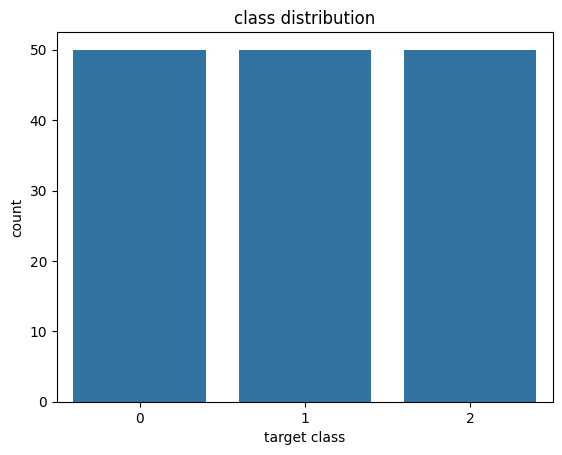

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Creates a bar plot showing the count of each unique value in the target
sns.countplot(x=df['target'])
plt.title("class distribution")
plt.xlabel("target class")
plt.ylabel("count")


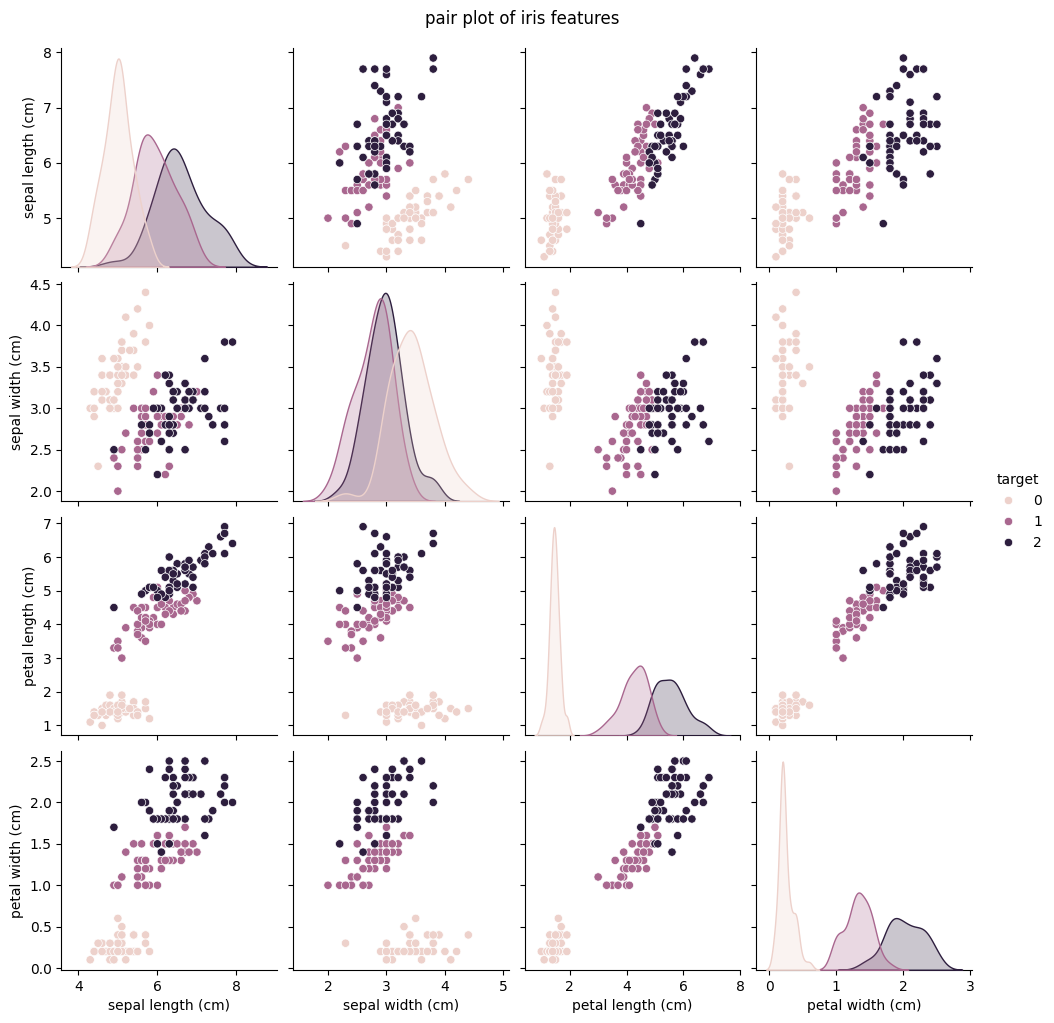

In [ ]:
sns.pairplot(df,hue='target')
plt.suptitle("pair plot of iris features",y=1.02)
plt.show()

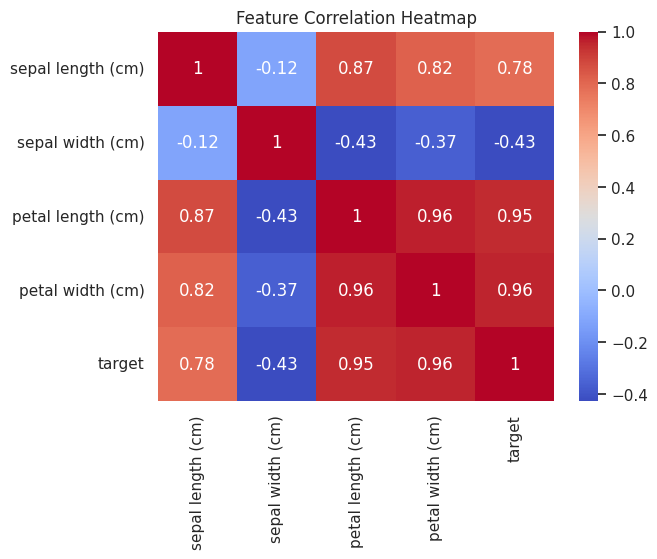

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the non-numeric 'class' column before calculating correlation
sns.heatmap(df.drop('class', axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
#StandardScaler class, which is used to standardize
#features by removing the mean and scaling to unit variance.



# create a object scaler
#scaler will calacute mean and stand deviation of ur training dtat when u call fit function
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

fit_transform = fit + transform

What happens here:

fit(X_train) computes the mean and standard deviation for each feature in X_train.

transform(X_train) applies the transformation:

𝑧=(𝑥−𝜇)/𝜎
Where:


x = original value
μ = mean of feature
σ = standard deviation of feature

🔹 4. X_test = scaler.transform(X_test)
Uses the same mean and standard deviation from training data to transform the test data.

⚠️ Important: Never use .fit() on test data — it would leak information.



Why Standardize?
Some models (like Logistic Regression, KNN, SVM, Neural Nets) are sensitive to feature scale.

Without standardization:

Features like "sepal length (cm)" might dominate over smaller-scaled features.

Training may be slower or give suboptimal results.

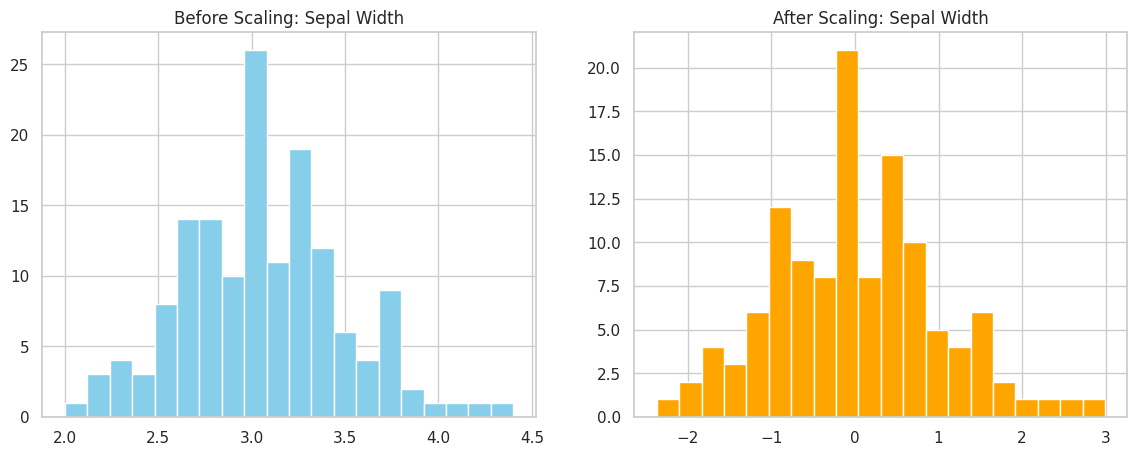

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(X.iloc[:, 1], bins=20, color="skyblue")
ax[0].set_title("Before Scaling: Sepal Width")

ax[1].hist(X_train[:, 1], bins=20, color="orange")
ax[1].set_title("After Scaling: Sepal Width")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

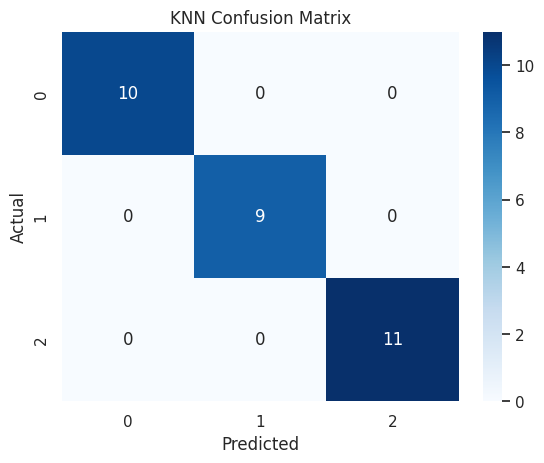

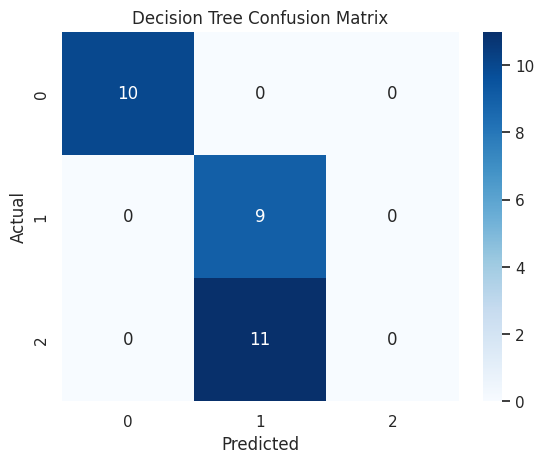

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion(y_test, y_pred_knn, "KNN Confusion Matrix")
plot_confusion(y_test, y_pred_tree, "Decision Tree Confusion Matrix")

In [ ]:
print("KNN Report:\n", classification_report(y_test, y_pred_knn))
print("Tree Report:\n", classification_report(y_test, y_pred_tree))

KNN Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
